

# Project: tmdb-movies data anlysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

in this project we'll be analyzing the data of (TMDb movie data) which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. in particular we'll be interesting in finding the properties are associated with movies that have high revenues and genres are most popular from year to year. 

i'll br interested in asnswer these questions:

-  What kinds of properties are associated with movies that have high revenues?
- Which movie genre are the most popular ?
- Which year has the highest number of movie released ?

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling





In [20]:
df=pd.read_csv("E:\\cs50\\fwd pro\\project 2 data investigation\\databases\\Database_TMDb_movie_data\\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
df.shape

(10866, 21)

In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 Data Cleaning

In [26]:
#check duplicated rows
df.duplicated().sum()

1

In [28]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [29]:
#check duplicated rows
df.duplicated().sum()

0

In [43]:
#there are some columns are not important in our analysis so we'll drop it from the database 
df_new=df.drop(['imdb_id', 'cast', 'homepage', 'director','tagline','overview','production_companies','release_date','keywords'], axis = 1)

In [44]:
df_new.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [45]:
# chick for missing values
df_new.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [46]:
#remove the missing rows value 
df_new.dropna(inplace=True)

In [47]:
df_new.info().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   release_year    10842 non-null  int64  
 10  budget_adj      10842 non-null  float64
 11  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


AttributeError: 'NoneType' object has no attribute 'sum'

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which movie genre are the most popular ?)

In [48]:
df_new.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
# split genres  at (|):
df_new = df_new.assign(genres=df_clean['genres'].str.split('|')).explode('genres')

In [51]:
df_new.head(5)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


In [73]:
genres =df_new['genres'].value_counts(ascending = False)

In [74]:
genres

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

Text(0.5, 1.0, 'Most popular movie genre')

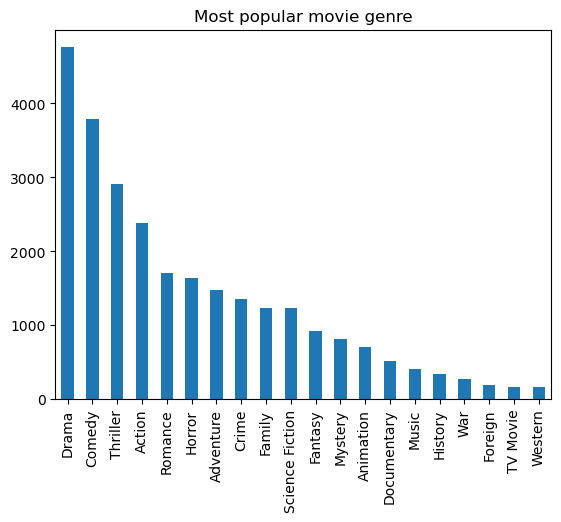

In [78]:
genres.plot.bar( fontsize = 10)
pltb.title('Most popular movie genre')

deama is the most popular genre and comdey comes next

### Research Question 2  (Which year has the highest number of movie released ?)

In [79]:
movie_released=df_new.groupby('release_year')['original_title'].count()
movie_released.head(5)

release_year
1960     78
1961     75
1962     82
1963     91
1964    111
Name: original_title, dtype: int64

In [81]:
movie_released.idxmax()

2014

Text(0.5, 1.0, 'relation between (release_year) and (count of movies)')

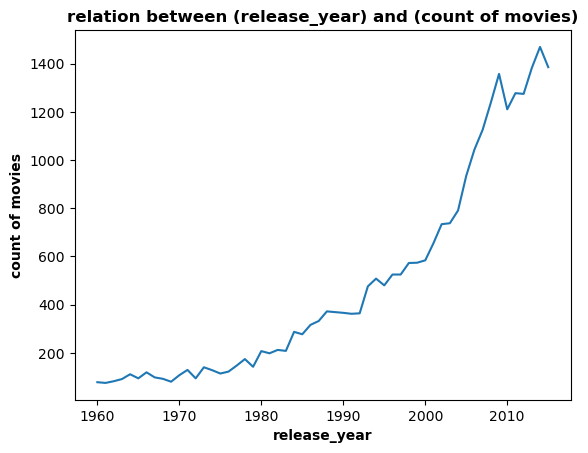

In [113]:
plt.plot(movie_released)
plt.xlabel('release_year',weight='bold')
plt.ylabel('count of movies',weight='bold')
plt.title('relation between (release_year) and (count of movies)',weight='bold')

as shown that no of movies increase every year and 2014 has the highest count of realesed movies 

# Research Question 3: What kinds of properties are associated with movies that have high revenues ?

In [86]:
df_new.revenue.describe()

count    2.695500e+04
mean     4.744365e+07
std      1.322100e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.053601e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [87]:
df_new.revenue.value_counts()

0           14291
12000000       24
11000000       22
10000000       18
5000000        18
            ...  
20045115        1
38307627        1
312751          1
1431623         1
33736689        1
Name: revenue, Length: 4702, dtype: int64

i'll use the top 50 high revenue movies for analysis and remove duplicated movies :

In [90]:
df_revenue = df_new[~df_new.id.duplicated()].nlargest(50,'revenue')

In [91]:
df_revenue.head(5)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,162,Action,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,194,Drama,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,143,Science Fiction,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09


In [116]:
df_new.shape

(26955, 12)

In [193]:
def df_relation(df, x, y) :
    plt.figure(figsize = [14.70, 8.27])
    plt.scatter(data=df,x=x,y=y);
    plt.xlabel(f'{x}({x})', weight='bold')
    plt.ylabel(f'{y}({y})', weight='bold')
    plt.title(f'Relationship between {x} and {y}', weight='bold')

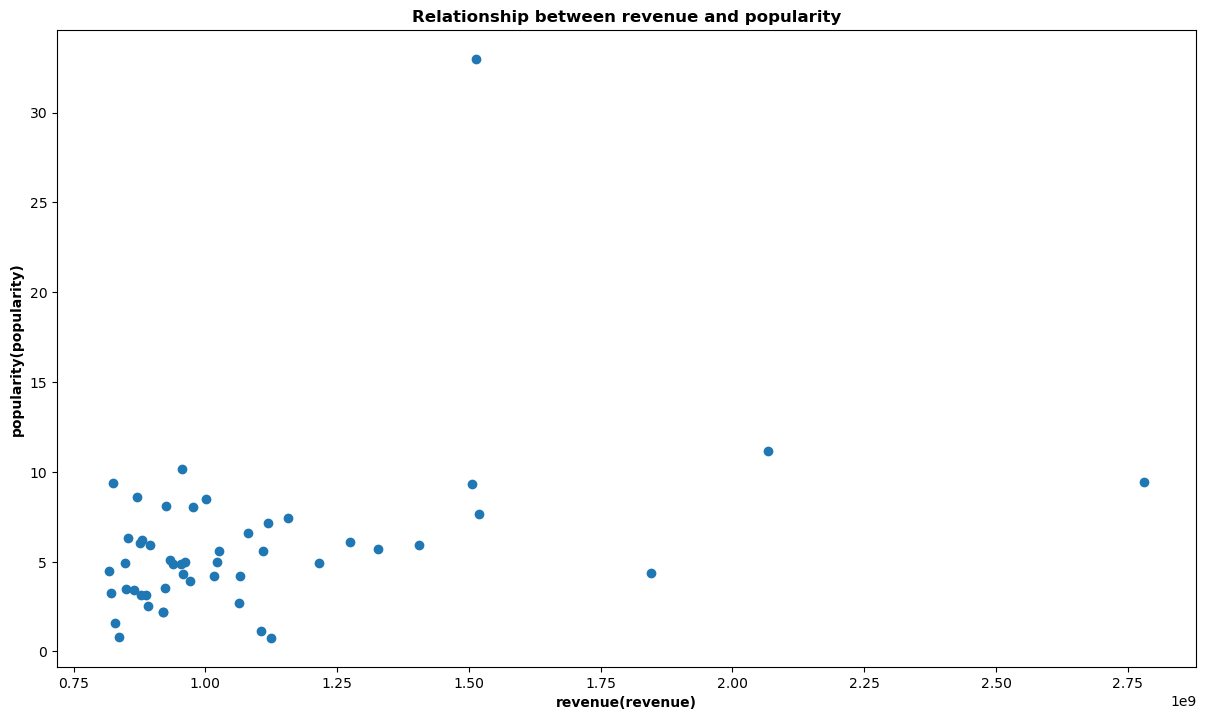

In [194]:
#relation between revenue and popularity:
df_relation(df_revenue,'revenue','popularity')

as shown the relaionship between revenue and popularity and we can see that revenue don't effect on the popularity

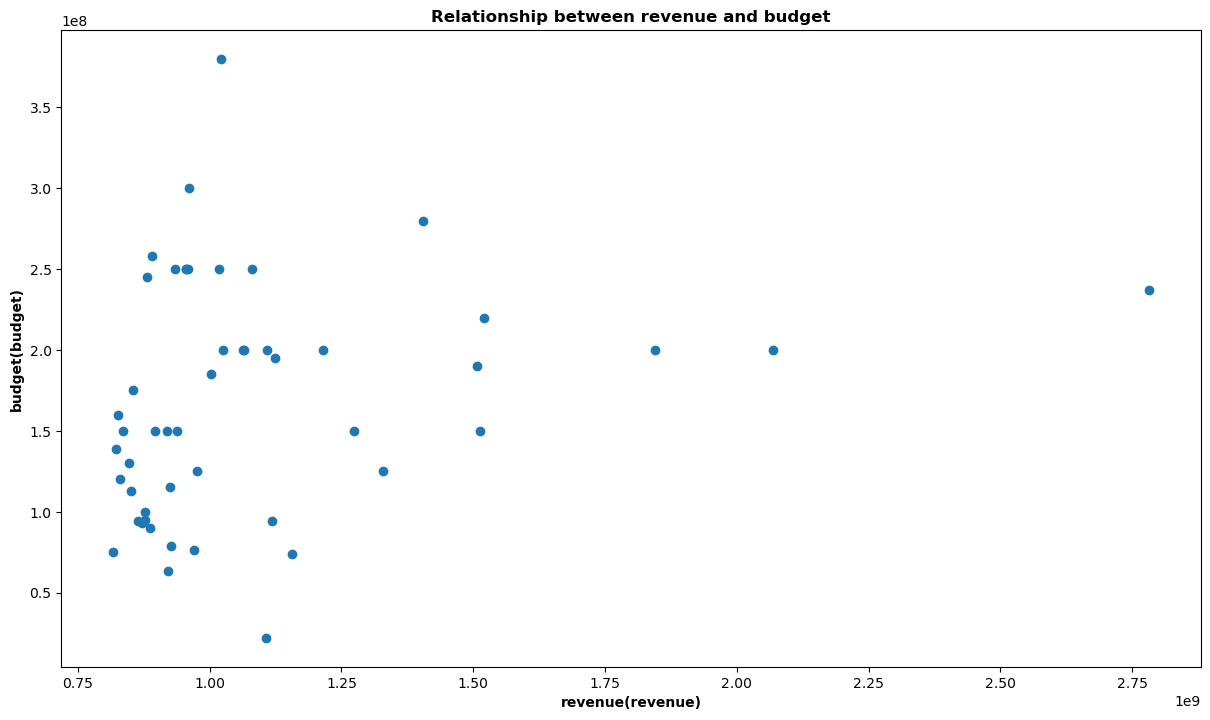

In [196]:
#relation between revenue and budget:
df_relation(df_revenue,'revenue','budget')

as shown the relaionship between revenue and budget and we can see that revenue don't effect on the budget

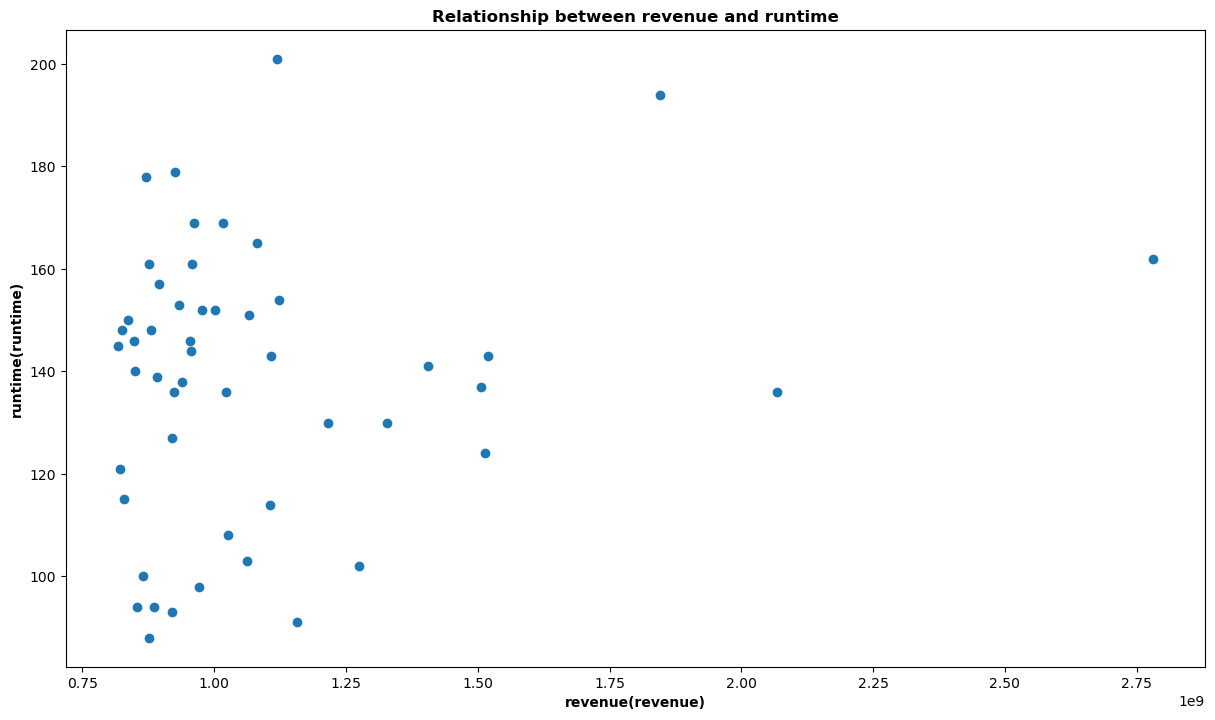

In [197]:
#relation between revenue and runtime:
df_relation(df_revenue,'revenue','runtime')

as we can see there no relation between revenue and runtime

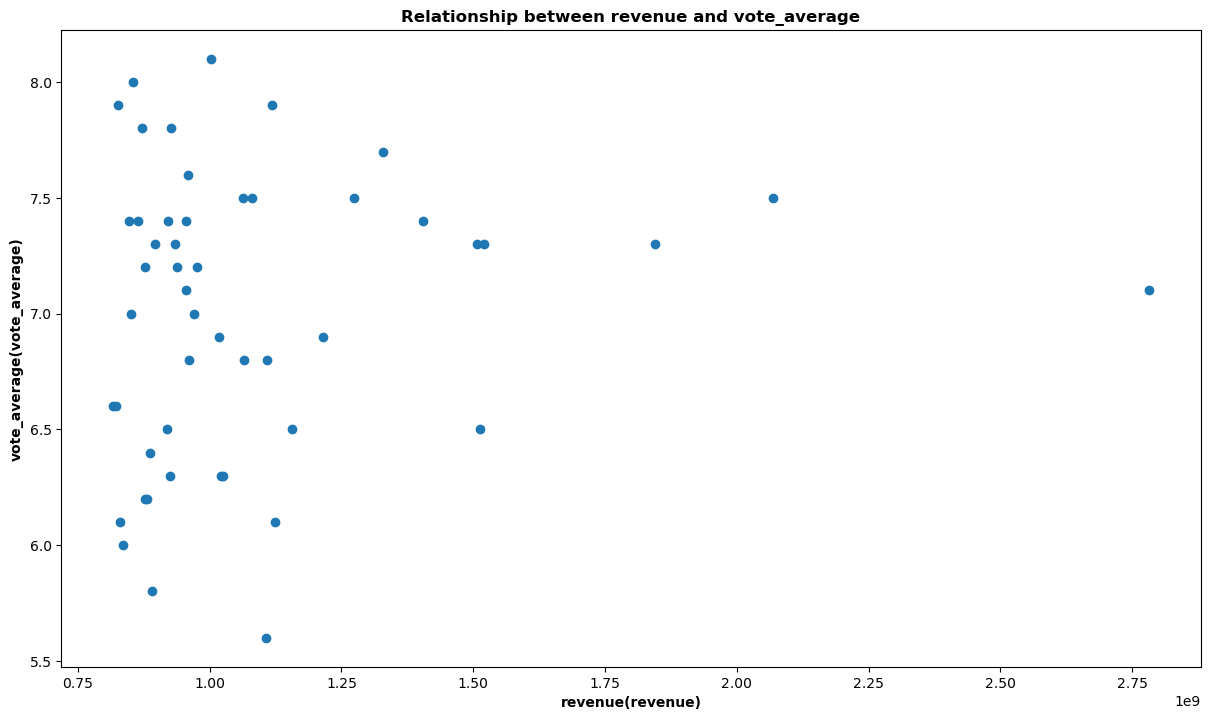

In [198]:
#relation between revenue and vote_average:
df_relation(df_revenue,'revenue','vote_average')

as we can see there no relation between revenue and votes of people

<a id='conclusions'></a>
## Conclusions

question 1 : 'drama' is the most popular movie genre               
question 2 : '2014' has the highest number of movie released         
question 3 : the scatter plots show the different relations between revenue and popularity and budget and runtime and vote_average  , which is weak correlation between them


In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

# Limitations
- i have droped some column[ 'imdb_id', 'cast', 'homepage', 'director','tagline','overview','production_companies','release_date','keywords']
and didn't use in my analysis becasue my analysis depens on revenue and these coulmns was not helpful for it
- i also used the most 50 top revenue  movie for gitting the properties are associated with movies that have high revenues